### Nama: Gabriella Caesaria Vianney
### NIM: 2209106007
### Kelas: Praktikum KB A1 2022
## POSTTEST 3

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

matplotlib.style.use('ggplot') # grafik menggunakan gaya ggplot

In [32]:
gaby = pd.read_csv('cleaned_all_phones.csv')
gaby.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [33]:
gaby.shape

(1512, 22)

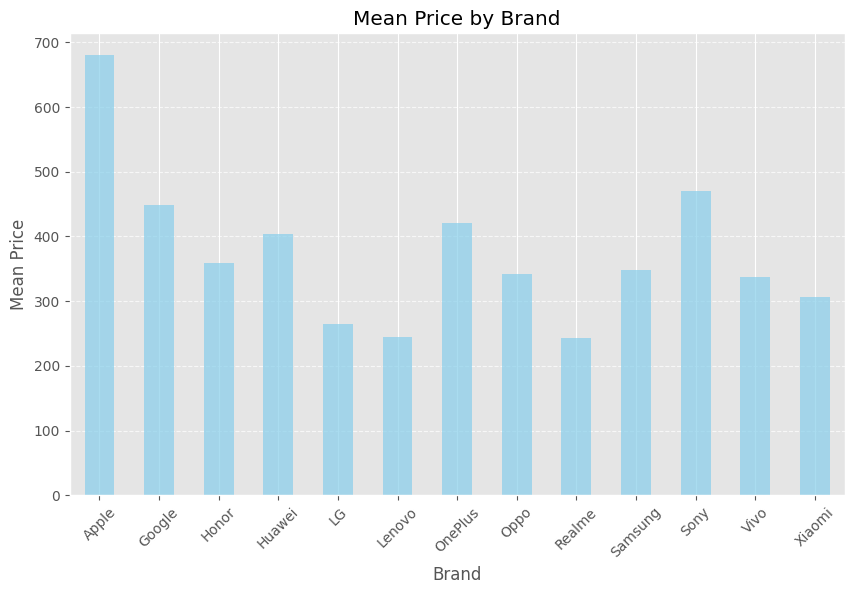

In [70]:
plt.figure(figsize=(10, 6))
brand_groups = gaby.groupby('brand')['price(USD)'].mean()

brand_groups.plot(kind='bar', color='skyblue', alpha=0.7)

plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.title('Mean Price by Brand')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Dari diagram batang diatas, kita bisa simpulkan bahwa harga HP paling tinggi terdapat pada brand Apple

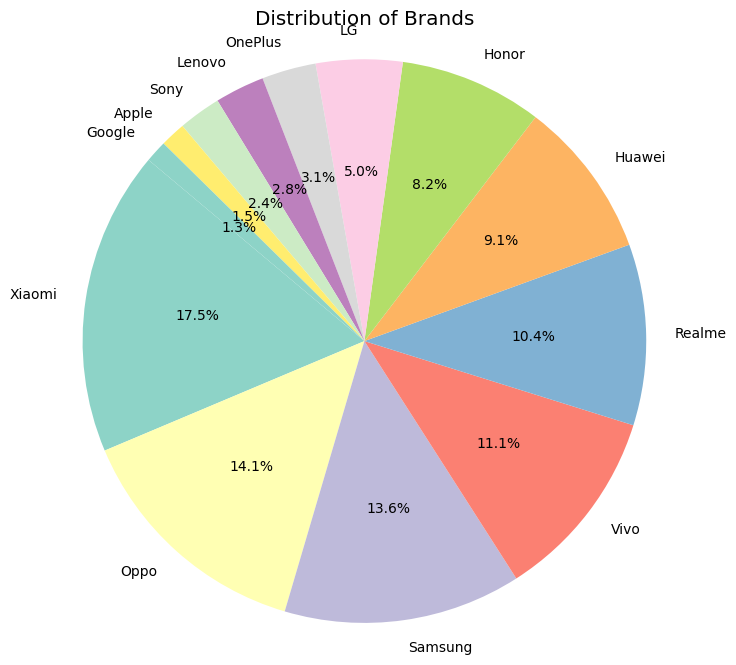

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(gaby['brand'].value_counts(), labels=gaby['brand'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Distribution of Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Dari diagram pie diatas, bisa disimpulkan bahwa distributor yang paling tinggi adalah brand Xiaomi

In [65]:
start_date = '2023-08-01'
end_date = '2023-08-30'

C:\Users\Laptop ASUS TUF\AppData\Local\Temp\ipykernel_14248\4054280334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaby_filtered['announcement_date'] = pd.to_datetime(gaby_filtered['announcement_date'])
C:\Users\Laptop ASUS TUF\AppData\Local\Temp\ipykernel_14248\4054280334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaby_filtered.sort_values('announcement_date', inplace=True)  # Sort by date


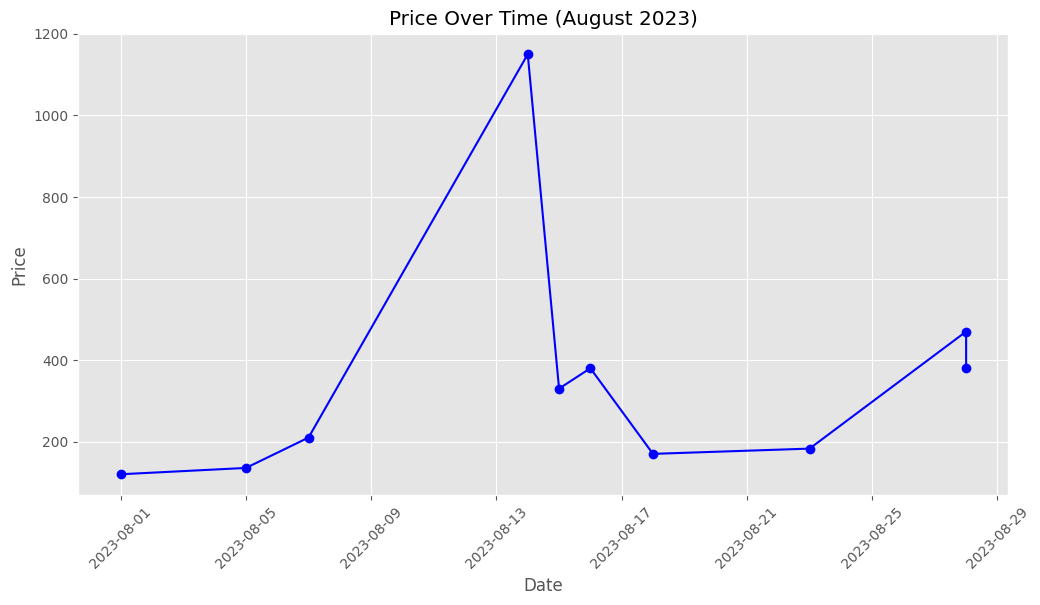

In [85]:
gaby_filtered = gaby[(gaby['announcement_date'] >= start_date) & (gaby['announcement_date'] <= end_date)]

plt.figure(figsize=(12, 6))
gaby_filtered['announcement_date'] = pd.to_datetime(gaby_filtered['announcement_date'])
gaby_filtered.sort_values('announcement_date', inplace=True)  # Sort by date
plt.plot(gaby_filtered['announcement_date'], gaby_filtered['price(USD)'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time (August 2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Dari diagram garis diatas, bisa disimpulkan bahwa, pada bulan agustus harga HP paling melonjak hampir mendekati harga 1200 USD

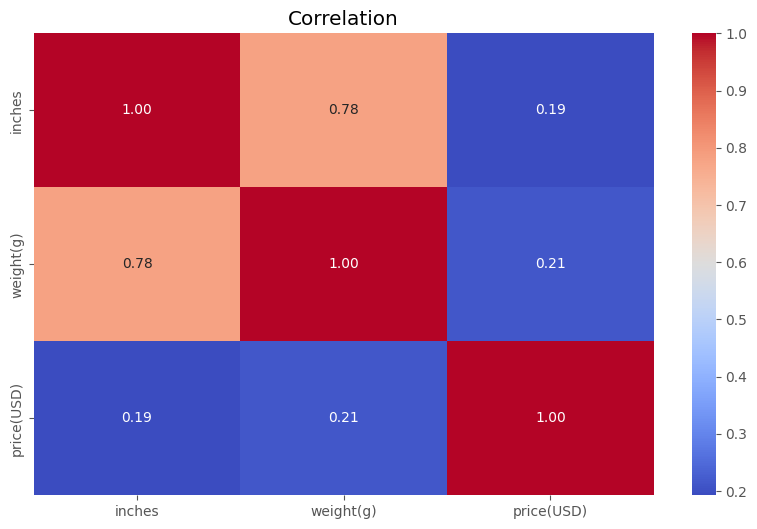

In [73]:
numeric_cols = gaby.select_dtypes(include=['float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()

##### Dari korelasi diatas, bisa disimpulkan bahwa, korelasi paling rendah adalah korelasi terhadap harga/price